In [2]:
from datetime import date, timedelta, datetime
import pandas as pd
import numpy as np
from keras.models import load_model
import math

Using TensorFlow backend.


In [7]:
#put your Data here

# only month and year
monthAndYear = "7-2019"

building = "222"
appartment = "402"


#don't touch this
month = datetime.strptime(monthAndYear,"%m-%Y")

In [9]:
#some code_names for string named appartments
new_appartments = {'???': 18, 'EL1': 19, 'EL2': 18, 'EL3': 11, 'EL4': 18, 'EL5': 12, 'EL6': 19}
if appartment in new_appartments:
    appartment = new_appartments[appartment]
    

#method for list of dates in year for for month
def days_month(month):
    m = month.month
    y = month.year
    try:
        ndays = (date(y, m+1, 1) - date(y, m, 1)).days
    except:
        ndays = (date(y, m, 1) - date(y, m-1, 1)).days
    d1 = date(y, m, 1)
    d2 = date(y, m, ndays)
    delta = d2 - d1
    return [(d1 + timedelta(days=i)).timetuple().tm_yday for i in range(delta.days + 1)]



#combine all data
dates = days_month(month)
apartment_numbers = [appartment for x in dates]
buildiing_numbers = [building for x in dates]
data = {'Date':dates, 'building_number':buildiing_numbers, "apartment_numbers":apartment_numbers}
df = pd.DataFrame(data)
data = df.values

In [5]:
#load model
model = load_model('model_final.h5')
model.summary()

W0604 12:58:30.453648 139758051563328 deprecation_wrapper.py:119] From /home/mubashir/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0604 12:58:31.110709 139758051563328 deprecation_wrapper.py:119] From /home/mubashir/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0604 12:58:31.273838 139758051563328 deprecation_wrapper.py:119] From /home/mubashir/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0604 12:58:31.276415 139758051563328 deprecation_wrapper.py:119] From /home/mubashir/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigPro

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 10)                40        
_________________________________________________________________
dense_28 (Dense)             (None, 24)                264       
Total params: 304
Trainable params: 304
Non-trainable params: 0
_________________________________________________________________


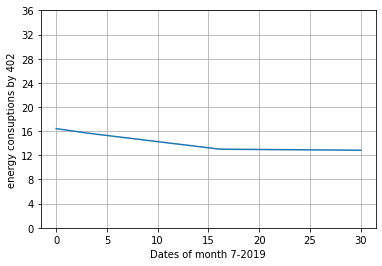

In [8]:
# full month prediction for a appartment
predictions=[]
for index in data:
    test = np.expand_dims(index,axis=0)
    predict = model.predict(test)[0]
    prediction =[]
    for x in predict:
        if x < 0:
            prediction.append(0)
        else:
            prediction.append(x)    
    predictions.append(float("%.2f"%math.fsum(prediction)))

    
#lets plot this
import matplotlib.pyplot as plt
plt.plot(range(len(dates)),predictions)
plt.yticks(range(0, 40,4))
plt.xlabel('Dates of month '+ monthAndYear)
plt.ylabel('energy consuptions by '+appartment)
plt.grid()
plt.show()